## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np
import seaborn as sns

## Specify filepaths

In [2]:
source_plate = 'data/20210427_mutant_plate_1_384.xlsx'
plate_data = 'data/20210429_5fc_mutants_plate1.xlsx'
layout_path = 'data/20220517_mutant_plates_rearray.xlsx'
graph_outpath = 'graphs/'

In [3]:
plate_df = pd.read_excel(source_plate, header=0, usecols=[0,1,2,3])
plate_df.head()

,well,condition,concentration,96_well
0,A1,control,0,A1
1,C1,control,0,B1
2,E1,control,0,C1
3,G1,control,0,D1
4,I1,control,0,E1


## Get plate reader data

In [4]:
def get_data(fpath):
    source_df = pd.read_excel(fpath, header=1, index_col=0,skiprows=[2],
                              #skipfooter=34
                             )
    source_df.rename(columns=lambda x: float(x.strip('s'))/3600, inplace=True)
    longdf = source_df.reset_index().rename(columns = {'index' : 'well'})
    longdf = longdf.melt(id_vars = ['well'], var_name = 'time (h)', value_name = 'OD') # wide to long dataframe
    return longdf

In [5]:
df = get_data(plate_data)
df

,well,time (h),OD
0,A1,0.0,0.094784
1,A2,0.0,0.118730
2,A3,0.0,0.114110
3,A4,0.0,0.138420
4,A5,0.0,0.132170
...,...,...,...
77179,P20,49.996944,1.603700
77180,P21,49.996944,1.451800
77181,P22,49.996944,1.590700
77182,P23,49.996944,1.499400


## Annotate data

In [6]:
layout_df = pd.read_excel(layout_path, header=0)[['mutant_plate','96_well','strain','fluc_assay','pre_culture','fluc_mutant','genotype','rearray_plate_nb','RA_well', 'respiration']]
annot_df = plate_df.merge(right=layout_df[layout_df.mutant_plate==1], on='96_well')
annot_df

,well,condition,concentration,96_well,mutant_plate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well,respiration
0,A1,control,0,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B1,5-FC,25,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A13,cytosine,250,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B13,5-FC,100,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C1,control,0,B1,1,LL13-040,1.0,1.0,3.0,mutant,2.0,B2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,N24,5-FC,100,G12,1,LL13-040,NaN,NaN,NaN,FCY1,1.0,I13,True
380,O12,control,0,H12,1,NC-02,NaN,NaN,NaN,FCY1,1.0,F23,True
381,P12,5-FC,25,H12,1,NC-02,NaN,NaN,NaN,FCY1,1.0,F23,True
382,O24,cytosine,250,H12,1,NC-02,NaN,NaN,NaN,FCY1,1.0,F23,True


In [7]:
NC02wt_index = annot_df[(annot_df.strain=='NC-02') & (annot_df.genotype=='wt')].index.tolist()
for i in NC02wt_index:
    annot_df.at[i,'rearray_plate_nb'] = 1
    annot_df.at[i,'RA_well'] = 'E23'
annot_df[(annot_df.strain=='NC-02') & (annot_df.genotype=='wt')]

,well,condition,concentration,96_well,mutant_plate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well,respiration
372,K12,control,0,F12,1,NC-02,NaN,NaN,NaN,wt,1.0,E23,True
373,L12,5-FC,25,F12,1,NC-02,NaN,NaN,NaN,wt,1.0,E23,True
374,K24,cytosine,250,F12,1,NC-02,NaN,NaN,NaN,wt,1.0,E23,True
375,L24,5-FC,100,F12,1,NC-02,NaN,NaN,NaN,wt,1.0,E23,True


In [8]:
merged_df = df.merge(right=annot_df, on=['well'])
merged_df

,well,time (h),OD,condition,concentration,96_well,mutant_plate,strain,fluc_assay,pre_culture,fluc_mutant,genotype,rearray_plate_nb,RA_well,respiration
0,A1,0.0,0.094784,control,0,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,0.25,0.094588,control,0,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A1,0.5,0.094049,control,0,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A1,0.75,0.094009,control,0,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1,0.999722,0.093975,control,0,A1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77179,P24,48.996944,0.640710,5-FC,100,H12,1,NC-02,NaN,NaN,NaN,FCY1,1.0,F23,True
77180,P24,49.246944,0.602290,5-FC,100,H12,1,NC-02,NaN,NaN,NaN,FCY1,1.0,F23,True
77181,P24,49.496944,0.543710,5-FC,100,H12,1,NC-02,NaN,NaN,NaN,FCY1,1.0,F23,True
77182,P24,49.746944,0.503630,5-FC,100,H12,1,NC-02,NaN,NaN,NaN,FCY1,1.0,F23,True


## Visualize growth curves

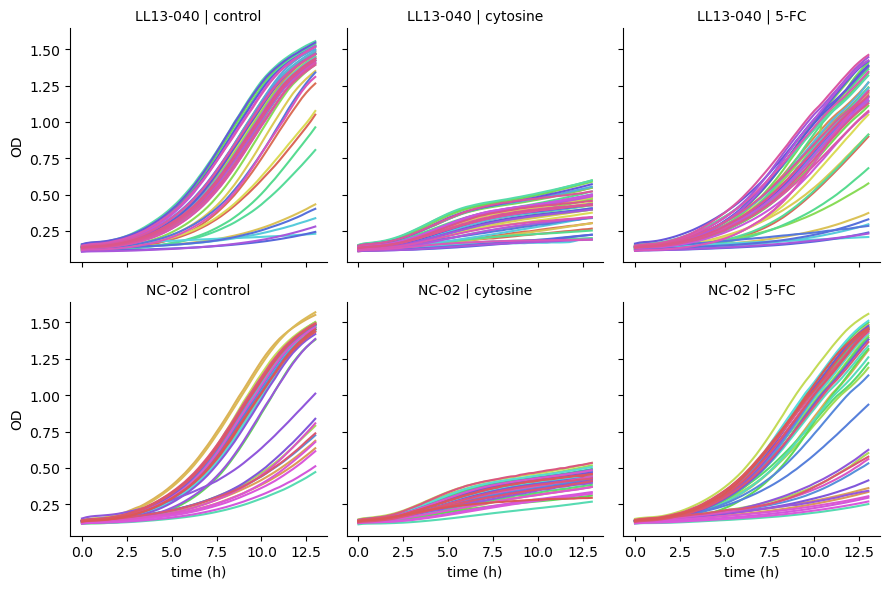

In [21]:
grid = sns.FacetGrid(data=merged_df[(merged_df.concentration!=25) & (merged_df['time (h)'] <=13)], col = 'condition', row='strain', hue='96_well', palette='hls')
grid.map(sns.lineplot, 'time (h)', 'OD')
grid.set_titles(col_template='{col_name}', row_template='{row_name}')
grid.set_axis_labels('time (h)', 'OD')
grid.tight_layout()

## Calculate normalized area under the curve (AUC)

In [9]:
from flucytosine_functions import get_auc
aucdf = merged_df[merged_df['time (h)'] <= 13].groupby(['condition','concentration','rearray_plate_nb','RA_well','strain','genotype','respiration','well']
                                                      )[['OD']].apply(func=get_auc).reset_index(name='auc')
aucdf

,condition,concentration,rearray_plate_nb,RA_well,strain,genotype,respiration,well,auc
0,5-FC,25,1.0,B14,NC-02,mutant,True,P7,30.221065
1,5-FC,25,1.0,B15,NC-02,mutant,True,L10,30.756635
2,5-FC,25,1.0,B2,LL13-040,mutant,True,F1,29.541470
3,5-FC,25,1.0,B3,LL13-040,mutant,True,J3,27.663395
4,5-FC,25,1.0,B4,LL13-040,mutant,True,F5,27.985695
...,...,...,...,...,...,...,...,...,...
375,cytosine,250,3.0,E3,NC-02,mutant,False,M20,10.939415
376,cytosine,250,3.0,F2,NC-02,mutant,False,I21,14.713695
377,cytosine,250,3.0,F3,NC-02,mutant,False,M21,12.565310
378,cytosine,250,3.0,G2,NC-02,mutant,False,K23,14.044755


In [10]:
aucdf[aucdf.genotype=='wt']

,condition,concentration,rearray_plate_nb,RA_well,strain,genotype,respiration,well,auc
18,5-FC,25,1.0,E23,NC-02,wt,True,L12,10.960205
82,5-FC,25,2.0,G11,LL13-040,wt,True,J12,10.307180
113,5-FC,100,1.0,E23,NC-02,wt,True,L24,11.260855
177,5-FC,100,2.0,G11,LL13-040,wt,True,J24,10.430320
208,control,0,1.0,E23,NC-02,wt,True,K12,26.586725
272,control,0,2.0,G11,LL13-040,wt,True,I12,24.917345
303,cytosine,250,1.0,E23,NC-02,wt,True,K24,13.566585
367,cytosine,250,2.0,G11,LL13-040,wt,True,I24,11.922705


## Calculate relative fitness based on WT AUC

In [11]:
def get_normalized_value(df, well):
    conditions_set = df.loc[df.well==well, ['condition','concentration','strain']].values.tolist()[0]  
    control = df.loc[(df['condition']==conditions_set[0]) & (df['concentration']==conditions_set[1]) & (df['strain']==conditions_set[2]) & (df['genotype']=='wt'), 'auc'].values[0]
    val = df.loc[df['well']==well, 'auc'].values[0]
    return val/control

In [12]:
aucdf['rel_fit'] = aucdf.well.apply(lambda x: get_normalized_value(aucdf, x))
aucdf

,condition,concentration,rearray_plate_nb,RA_well,strain,genotype,respiration,well,auc,rel_fit
0,5-FC,25,1.0,B14,NC-02,mutant,True,P7,30.221065,2.757345
1,5-FC,25,1.0,B15,NC-02,mutant,True,L10,30.756635,2.806210
2,5-FC,25,1.0,B2,LL13-040,mutant,True,F1,29.541470,2.866106
3,5-FC,25,1.0,B3,LL13-040,mutant,True,J3,27.663395,2.683896
4,5-FC,25,1.0,B4,LL13-040,mutant,True,F5,27.985695,2.715165
...,...,...,...,...,...,...,...,...,...,...
375,cytosine,250,3.0,E3,NC-02,mutant,False,M20,10.939415,0.806350
376,cytosine,250,3.0,F2,NC-02,mutant,False,I21,14.713695,1.084554
377,cytosine,250,3.0,F3,NC-02,mutant,False,M21,12.565310,0.926196
378,cytosine,250,3.0,G2,NC-02,mutant,False,K23,14.044755,1.035246


C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\utils.py:482: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


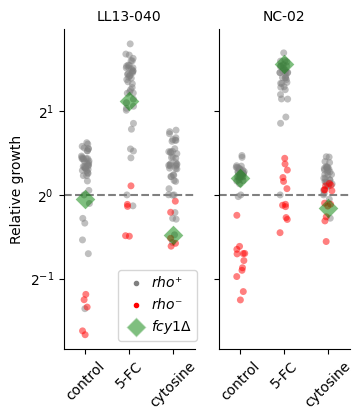

In [13]:
strains = ['LL13-040','NC-02']
fig = sns.catplot(data=aucdf[(aucdf.concentration!=100) & (aucdf.genotype!='FCY1')],
                  x='condition', y='rel_fit', order=['control','5-FC','cytosine'],
                  col='strain', col_order=strains,
                  hue='respiration', hue_order=[True,False], palette=['grey','red'], alpha=.5,
                  kind='strip', legend_out=False,
                  height=4.3, aspect=0.44 # height*aspect = width of EACH facet
                 )

fig.map(plt.axhline, y=1, ls='--', c='grey')

for i, s in enumerate(strains):
    sns.stripplot(data=aucdf[(aucdf.concentration!=100) & (aucdf.genotype=='FCY1') & (aucdf.strain==s)],
                  x='condition', y='rel_fit', order=['control','5-FC','cytosine'],
                  color='green', marker='D', s=10, alpha=.5, zorder=10, legend=None,
                  ax=fig.axes[0][i])

plt.yscale('log',base=2)
fig.set_xticklabels(['control','5-FC','cytosine'], rotation=45)
fig.set_axis_labels('', 'Relative growth')
fig.set_titles(col_template='{col_name}')

from matplotlib.lines import Line2D
from matplotlib.colors import to_rgba
handles, labels = fig.axes[0][1].get_legend_handles_labels()
handles.append(Line2D([0], [0], marker='D', color='w', markerfacecolor=to_rgba('green',0.5), markersize=20))
sns.move_legend(fig, bbox_to_anchor=(0.25, 0.18), loc='lower left', title=None, frameon=True,
                handles=handles, labels=['$\it{rho}$⁺','$\it{rho}$⁻',u'$\it{fcy1}$Δ'],
                markerscale=0.5, handletextpad=0.1, borderpad=0.3)

fig.tight_layout()
plt.savefig(graph_outpath+'/20230418_TECAN384_5-FC_25_relfit.png', format='png', dpi=300)
plt.savefig(graph_outpath+'/20230418_TECAN384_5-FC_25_relfit.svg', format='svg', dpi=300)

In [51]:
tecan384df = aucdf[(aucdf.condition.isin(['control','5-FC'])) & (aucdf.concentration!=100)]
tecan384wide_df = tecan384df.pivot(index=['rearray_plate_nb','RA_well','strain','genotype','respiration'],columns='condition', values='rel_fit').reset_index()
tecan384wide_df.rename(columns={'control':'SD_liq','5-FC':'5-FC_liq'}, inplace=True)
tecan384wide_df

condition,rearray_plate_nb,RA_well,strain,genotype,respiration,5-FC_liq,SD_liq
0,1.0,B14,NC-02,mutant,True,2.757345,1.269227
1,1.0,B15,NC-02,mutant,True,2.806210,1.096943
2,1.0,B2,LL13-040,mutant,True,2.866106,1.279732
3,1.0,B3,LL13-040,mutant,True,2.683896,1.283241
4,1.0,B4,LL13-040,mutant,True,2.715165,1.475373
...,...,...,...,...,...,...,...
90,3.0,E3,NC-02,mutant,False,0.816232,0.508661
91,3.0,F2,NC-02,mutant,False,1.118174,0.616176
92,3.0,F3,NC-02,mutant,False,0.907390,0.547253
93,3.0,G2,NC-02,mutant,False,1.292205,0.844786


In [52]:
tecan384wide_df.to_excel('data/20230418_tecan384wide.xlsx')